In [1]:
import torch
import matplotlib.pyplot as plt
from torchvision import transforms 

from functions import *

from IPython.display import display, HTML
from IPython.display import display
display(HTML("<style>.container { width:70% !important; }</style>"))


In [2]:
original = torch.load('data/dataset_distlognorm_massnorm.pt')

### all models are trained with 200 eocihs, T = 1000 and linear scheduler

# interpolation = NEAREST

In [3]:
nearest = torch.load("../testing/interpolation/generated_image__NEAREST_T=1000_linear.pt", map_location = "cpu")
interpolation = transforms.InterpolationMode.NEAREST
transform = transforms.Resize((29, 10), interpolation = interpolation)
nearest = transform(nearest.to(dtype=torch.float))
nearest = normalize(nearest, True, [0, 1, 2])

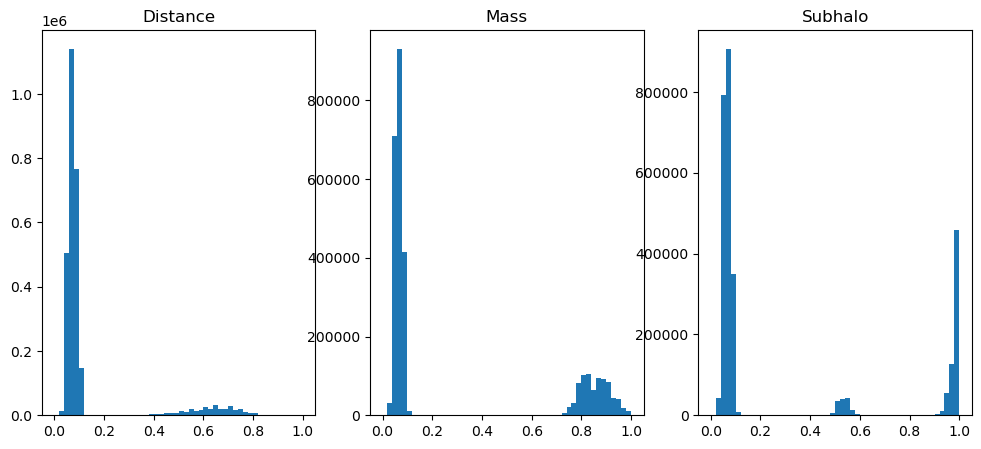

In [4]:
dist = nearest[:, 0]
mass = nearest[:, 1]
subh = nearest[:, 2]

fig, axs = plt.subplots(1, 3, figsize=(12, 5))

# Display the first image in the first subplot
axs[0].hist(dist.numpy().flatten(), bins = 50)
axs[0].set_title('Distance')

# Display the second image in the second subplot
axs[1].hist(mass.numpy().flatten(), bins = 50)
axs[1].set_title('Mass')

# Display the second image in the second subplot
axs[2].hist(subh.numpy().flatten(), bins = 50)
axs[2].set_title('Subhalo')

plt.show()



In [5]:
# dist
print("dist:")
lower_threshold = 0.2
upper_threshold = 0.25
count_between_thresholds = torch.sum((dist > lower_threshold) & (dist < upper_threshold)).item()
total_elements = dist.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")

print("mass:")
lower_threshold = 0.15
upper_threshold = 0.6985
count_between_thresholds = torch.sum((mass > lower_threshold) & (mass < upper_threshold)).item()
total_elements = mass.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")

print("subh:")
lower_threshold = 0.15
upper_threshold = 0.47
count_between_thresholds = torch.sum((subh > lower_threshold) & (subh < upper_threshold)).item()
total_elements = subh.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")
lower_threshold = 0.61
upper_threshold = 0.88
count_between_thresholds = torch.sum((subh > lower_threshold) & (subh < upper_threshold)).item()
total_elements = subh.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")


dist:
Percentage of values between 0.2 and 0.25: 0.01%

mass:
Percentage of values between 0.15 and 0.6985: 0.00%

subh:
Percentage of values between 0.15 and 0.47: 0.00%

Percentage of values between 0.61 and 0.88: 0.00%



In [6]:
nearest = torch.load("../testing/interpolation/generated_image__NEAREST_T=1000_linear.pt", map_location = "cpu")
interpolation = transforms.InterpolationMode.NEAREST
transform = transforms.Resize((29, 10), interpolation = interpolation)
nearest = transform(nearest.to(dtype=torch.float))
nearest = normalize(nearest, True, [0, 1, 2])
nearest = transform_diffusion_image(nearest, d_thresh = 0.25, m_tresh = 0.6985, s_low = 0.3, s_high = 0.77)

original_min = 0.6985
mass = nearest[:, 1]
nonzero_indices = torch.nonzero(mass.flatten())
nonzero_mass = mass.flatten()[nonzero_indices[:, 0]]
print("mass:")
count_between_thresholds = torch.sum(nonzero_mass < original_min).item()
total_elements = mass.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values below {original_min}: {percentage_between_thresholds:.2f}%\n")

mass:
Percentage of values below 0.6985: 0.00%



In [7]:

full_evaluation(nearest, original)

Analyzing generated merger tree dataset ...

			 CONSISTENCY CHECK


Percentage of consistant images = 0.0%

Inconsistency reasons:
inconsistency due to zero / nonzero mistake = 100.00%
inconsistency due to distance not zero in main branch =  0.00%
inconsistency due to gap between branches =  100.00%
inconsistency due to zgap in branch 2.06%
inconsistency due to last descendant dont exist 100.00%

Number of images with two or more inconsistencies = 10000, which is  100.00%
That corresponds to 100.00% of all images


Of all images, 100.00% have zero inconsistency
Of all images, 0.00% have distance main branch inconsistency
Of all images, 100.00% have gap between branches inconsistency
Of all images, 2.06% have gap within branch inconsistency
Of all images, 100.00% have last descendant inconsistency


Analyzing generated merger tree dataset done


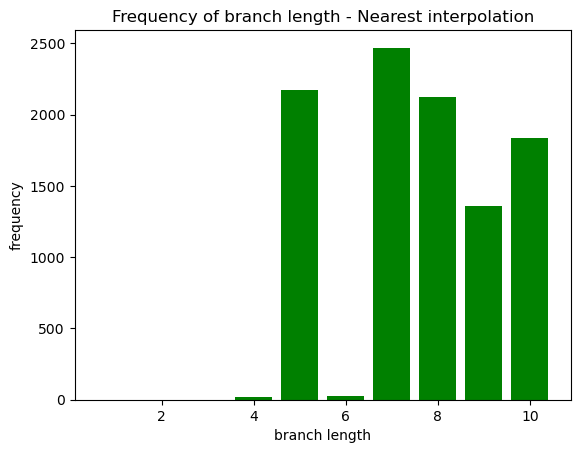

In [8]:
num_branches = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
length = [0, 0, 0, 18, 2173, 23, 2469, 2123, 1358, 1836]

plt.bar(num_branches, length, color = "g")

# Add title and labels
plt.title('Frequency of branch length - Nearest interpolation')
plt.xlabel('branch length')
plt.ylabel('frequency')

# Show the plot
plt.show()

# interpolation = NEAREST EXACT

In [10]:
nearest_exact = torch.load("../testing/interpolation/generated_image_NEAREST_EXACT_T=1000_linear.pt", map_location = "cpu")
interpolation = transforms.InterpolationMode.NEAREST_EXACT
transform = transforms.Resize((29, 10), interpolation = interpolation)
nearest_exact = transform(nearest_exact.to(dtype=torch.float))
nearest_exact = normalize(nearest_exact, True, [0, 1, 2])

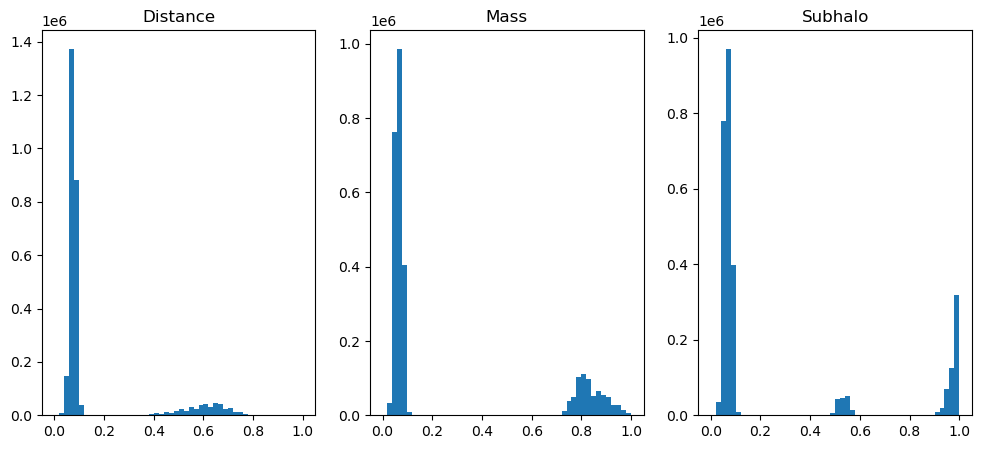

In [11]:
dist = nearest_exact[:, 0]
mass = nearest_exact[:, 1]
subh = nearest_exact[:, 2]

fig, axs = plt.subplots(1, 3, figsize=(12, 5))

# Display the first image in the first subplot
axs[0].hist(dist.numpy().flatten(), bins = 50)
axs[0].set_title('Distance')

# Display the second image in the second subplot
axs[1].hist(mass.numpy().flatten(), bins = 50)
axs[1].set_title('Mass')

# Display the second image in the second subplot
axs[2].hist(subh.numpy().flatten(), bins = 50)
axs[2].set_title('Subhalo')

plt.show()



In [12]:
# dist
print("dist:")
lower_threshold = 0.13
upper_threshold = 0.23
count_between_thresholds = torch.sum((dist > lower_threshold) & (dist < upper_threshold)).item()
total_elements = dist.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")

print("mass:")
lower_threshold = 0.12
upper_threshold = 0.6985
count_between_thresholds = torch.sum((mass > lower_threshold) & (mass < upper_threshold)).item()
total_elements = mass.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")

print("subh:")
lower_threshold = 0.12
upper_threshold = 0.47
count_between_thresholds = torch.sum((subh > lower_threshold) & (subh < upper_threshold)).item()
total_elements = subh.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")
lower_threshold = 0.63
upper_threshold = 0.89
count_between_thresholds = torch.sum((subh > lower_threshold) & (subh < upper_threshold)).item()
total_elements = subh.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")


dist:
Percentage of values between 0.13 and 0.23: 0.00%

mass:
Percentage of values between 0.12 and 0.6985: 0.00%

subh:
Percentage of values between 0.12 and 0.47: 0.00%

Percentage of values between 0.63 and 0.89: 0.00%



In [14]:
nearest_exact = torch.load("../testing/interpolation/generated_image_NEAREST_EXACT_T=1000_linear.pt", map_location = "cpu")
interpolation = transforms.InterpolationMode.NEAREST_EXACT
transform = transforms.Resize((29, 10), interpolation = interpolation)
nearest_exact = transform(nearest_exact.to(dtype=torch.float))
nearest_exact = normalize(nearest_exact, True, [0, 1, 2])
nearest_exact = transform_diffusion_image(nearest_exact, d_thresh = 0.2, m_tresh = 0.6985, s_low = 0.35, s_high = 0.77)

original_min = 0.6985
mass = nearest_exact[:, 1]
nonzero_indices = torch.nonzero(mass.flatten())
nonzero_mass = mass.flatten()[nonzero_indices[:, 0]]
print("mass:")
count_between_thresholds = torch.sum(nonzero_mass < original_min).item()
total_elements = mass.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values below {original_min}: {percentage_between_thresholds:.2f}%\n")

mass:
Percentage of values below 0.6985: 0.00%



In [15]:

full_evaluation(nearest_exact, original)

Analyzing generated merger tree dataset ...

			 CONSISTENCY CHECK


Percentage of consistant images = 60.73%



Inconsistency reasons:
inconsistency due to zero / nonzero mistake = 89.79%
inconsistency due to distance not zero in main branch =  0.00%
inconsistency due to gap between branches =  20.70%
inconsistency due to zgap in branch 8.79%
inconsistency due to last descendant dont exist 0.00%

Number of images with two or more inconsistencies = 723, which is  18.41%
That corresponds to 7.23% of all images


Of all images, 35.26% have zero inconsistency
Of all images, 0.00% have distance main branch inconsistency
Of all images, 8.13% have gap between branches inconsistency
Of all images, 3.45% have gap within branch inconsistency
Of all images, 0.00% have last descendant inconsistency

			 VARIABLE CONSISTENY CHECK of consistent trees
-------------------------------------------------------------------------------------------------------
MASS:
----------------------------------------

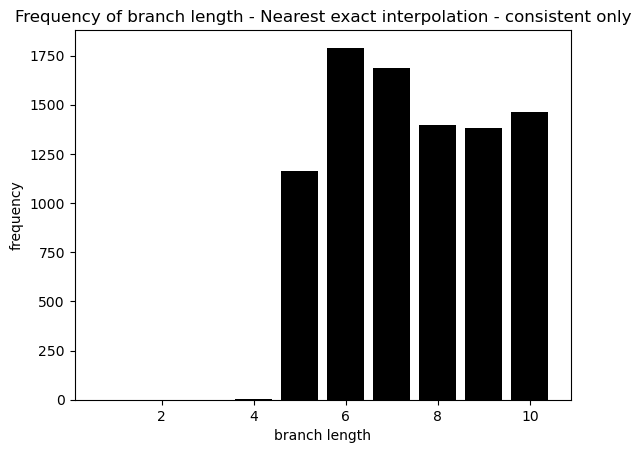

In [16]:
num_branches = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
length = [0, 0, 0, 4, 1161, 1790, 1688, 1397, 1381, 1462]

plt.bar(num_branches, length, color = "black")

# Add title and labels
plt.title('Frequency of branch length - Nearest exact interpolation - consistent only')
plt.xlabel('branch length')
plt.ylabel('frequency')

# Show the plot
plt.show()

# interpolation = BILINEAR


In [17]:
bilinear = torch.load("../testing/interpolation/generated_image_BILINEAR_T=1000_linear.pt", map_location = "cpu")
interpolation = transforms.InterpolationMode.BILINEAR
transform = transforms.Resize((29, 10), interpolation = interpolation)
bilinear = transform(bilinear.to(dtype=torch.float))
bilinear = normalize(bilinear, True, [0, 1, 2])

/Users/corneliusbencsik/anaconda3/lib/python3.11/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


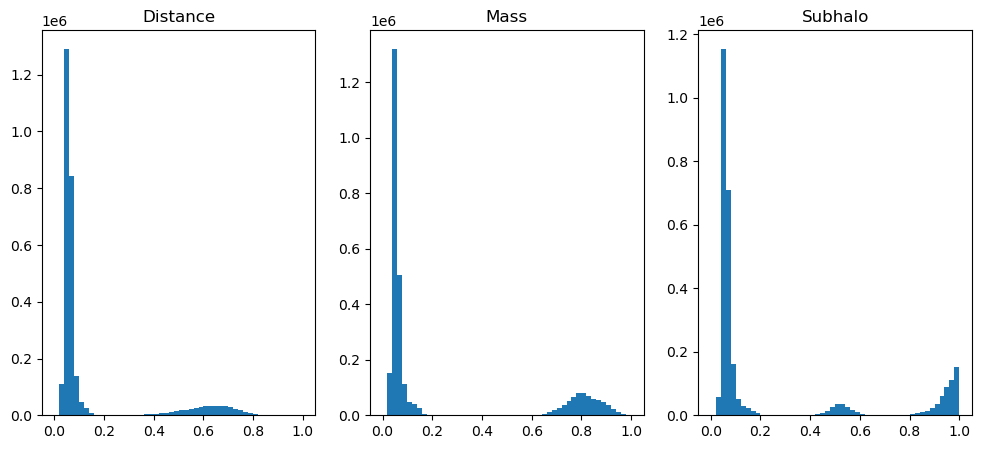

In [18]:
bilinear = torch.load("../testing/interpolation/generated_image_BILINEAR_T=1000_linear.pt", map_location = "cpu")
bilinear = transform(bilinear.to(dtype=torch.float))
bilinear = normalize(bilinear, True, [0, 1, 2])

dist = bilinear[:, 0]
mass = bilinear[:, 1]
subh = bilinear[:, 2]

fig, axs = plt.subplots(1, 3, figsize=(12, 5))

# Display the first image in the first subplot
axs[0].hist(dist.numpy().flatten(), bins = 50)
axs[0].set_title('Distance')

# Display the second image in the second subplot
axs[1].hist(mass.numpy().flatten(), bins = 50)
axs[1].set_title('Mass')

# Display the second image in the second subplot
axs[2].hist(subh.numpy().flatten(), bins = 50)
axs[2].set_title('Subhalo')

plt.show()



In [19]:
# dist
print("dist:")
lower_threshold = 0.2
upper_threshold = 0.25
count_between_thresholds = torch.sum((dist > lower_threshold) & (dist < upper_threshold)).item()
total_elements = dist.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")

print("mass:")
lower_threshold = 0.2
upper_threshold = 0.54
count_between_thresholds = torch.sum((mass > lower_threshold) & (mass < upper_threshold)).item()
total_elements = mass.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")

print("subh:")
lower_threshold = 0.25
upper_threshold = 0.39
count_between_thresholds = torch.sum((subh > lower_threshold) & (subh < upper_threshold)).item()
total_elements = subh.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")
lower_threshold = 0.7
upper_threshold = 0.73
count_between_thresholds = torch.sum((subh > lower_threshold) & (subh < upper_threshold)).item()
total_elements = subh.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")


dist:
Percentage of values between 0.2 and 0.25: 0.01%

mass:
Percentage of values between 0.2 and 0.54: 0.00%

subh:
Percentage of values between 0.25 and 0.39: 0.00%

Percentage of values between 0.7 and 0.73: 0.00%



In [20]:
bilinear = torch.load("../testing/interpolation/generated_image_BILINEAR_T=1000_linear.pt", map_location = "cpu")
interpolation = transforms.InterpolationMode.BILINEAR
transform = transforms.Resize((29, 10), interpolation = interpolation)
bilinear = transform(bilinear.to(dtype=torch.float))
bilinear = normalize(bilinear, True, [0, 1, 2])
bilinear = transform_diffusion_image(bilinear, d_thresh = 0.25, m_tresh = 0.53, s_low = 0.3, s_high = 0.72)

original_min = 0.6985
mass = bilinear[:, 1]
nonzero_indices = torch.nonzero(mass.flatten())
nonzero_mass = mass.flatten()[nonzero_indices[:, 0]]
print("mass:")
count_between_thresholds = torch.sum(nonzero_mass < original_min).item()
total_elements = mass.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values below {original_min}: {percentage_between_thresholds:.2f}%\n")

mass:
Percentage of values below 0.6985: 1.35%



In [21]:
full_evaluation(bilinear, original)

Analyzing generated merger tree dataset ...

			 CONSISTENCY CHECK


Percentage of consistant images = 69.13%



Inconsistency reasons:
inconsistency due to zero / nonzero mistake = 94.04%
inconsistency due to distance not zero in main branch =  0.00%
inconsistency due to gap between branches =  12.08%
inconsistency due to zgap in branch 8.81%
inconsistency due to last descendant dont exist 0.00%

Number of images with two or more inconsistencies = 447, which is  14.48%
That corresponds to 4.47% of all images


Of all images, 29.03% have zero inconsistency
Of all images, 0.00% have distance main branch inconsistency
Of all images, 3.73% have gap between branches inconsistency
Of all images, 2.72% have gap within branch inconsistency
Of all images, 0.00% have last descendant inconsistency

			 VARIABLE CONSISTENY CHECK of consistent trees
-------------------------------------------------------------------------------------------------------
MASS:
----------------------------------------

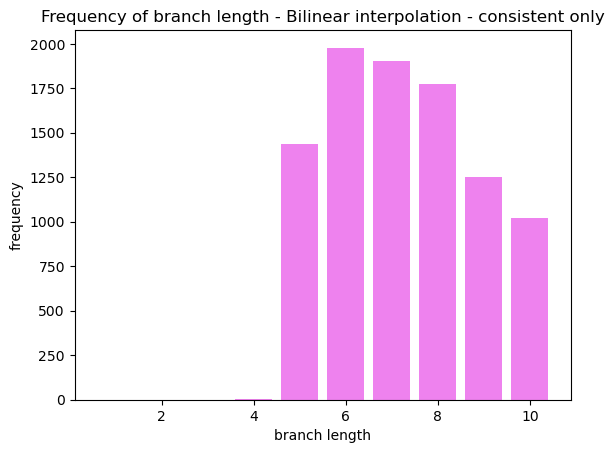

In [23]:
num_branches = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
length = [0, 0, 0, 3, 1439, 1978, 1903, 1773, 1251, 1023]

plt.bar(num_branches, length, color = "violet")

# Add title and labels
plt.title('Frequency of branch length - Bilinear interpolation - consistent only')
plt.xlabel('branch length')
plt.ylabel('frequency')

# Show the plot
plt.show()

# interpolation = BICUBIC


In [24]:
bicubic = torch.load("../testing/interpolation/generated_image_BICUBIC_T=1000_linear.pt", map_location = "cpu")
interpolation = transforms.InterpolationMode.BICUBIC
transform = transforms.Resize((29, 10), interpolation = interpolation)
bicubic = transform(bicubic.to(dtype=torch.float))
bicubic = normalize(bicubic, True, [0, 1, 2])

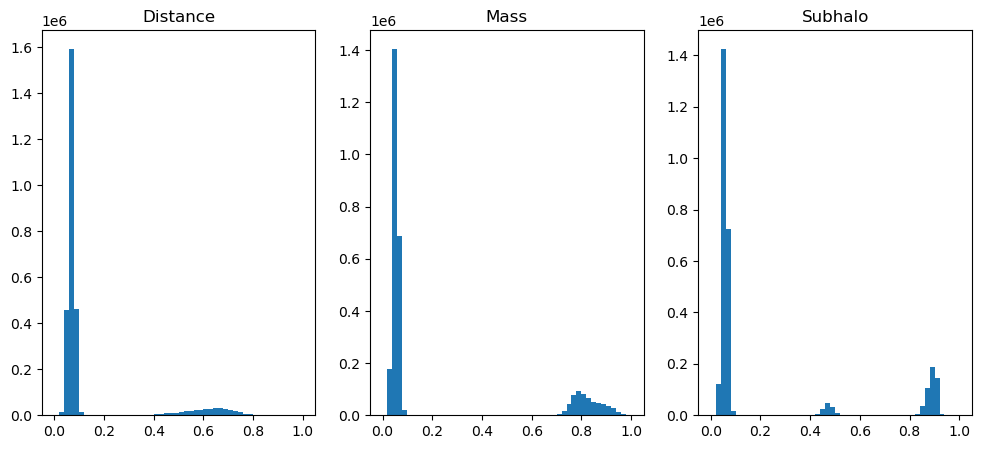

In [25]:
dist = bicubic[:, 0]
mass = bicubic[:, 1]
subh = bicubic[:, 2]

fig, axs = plt.subplots(1, 3, figsize=(12, 5))

# Display the first image in the first subplot
axs[0].hist(dist.numpy().flatten(), bins = 50)
axs[0].set_title('Distance')

# Display the second image in the second subplot
axs[1].hist(mass.numpy().flatten(), bins = 50)
axs[1].set_title('Mass')

# Display the second image in the second subplot
axs[2].hist(subh.numpy().flatten(), bins = 50)
axs[2].set_title('Subhalo')

plt.show()

In [26]:
# dist

print("dist:")
lower_threshold = 0.13
upper_threshold = 0.23
count_between_thresholds = torch.sum((dist > lower_threshold) & (dist < upper_threshold)).item()
total_elements = dist.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")

print("mass:")
lower_threshold = 0.1
upper_threshold = 0.67
count_between_thresholds = torch.sum((mass > lower_threshold) & (mass < upper_threshold)).item()
total_elements = mass.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")

print("subh:")
lower_threshold = 0.1
upper_threshold = 0.42
count_between_thresholds = torch.sum((subh > lower_threshold) & (subh < upper_threshold)).item()
total_elements = subh.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")
lower_threshold = 0.55
upper_threshold = 0.81
count_between_thresholds = torch.sum((subh > lower_threshold) & (subh < upper_threshold)).item()
total_elements = subh.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")


dist:
Percentage of values between 0.13 and 0.23: 0.00%

mass:
Percentage of values between 0.1 and 0.67: 0.00%

subh:
Percentage of values between 0.1 and 0.42: 0.00%

Percentage of values between 0.55 and 0.81: 0.00%



In [27]:
bicubic = torch.load("../testing/interpolation/generated_image_BICUBIC_T=1000_linear.pt", map_location = "cpu")
interpolation = transforms.InterpolationMode.BICUBIC
transform = transforms.Resize((29, 10), interpolation = interpolation)
bicubic = transform(bicubic.to(dtype=torch.float))
bicubic = normalize(bicubic, True, [0, 1, 2])
bicubic = transform_diffusion_image(bicubic, d_thresh = 0.18, m_tresh = 0.6, s_low = 0.3, s_high = 0.72)

original_min = 0.6958
mass = bicubic[:, 1]
nonzero_indices = torch.nonzero(mass.flatten())
nonzero_mass = mass.flatten()[nonzero_indices[:, 0]]
print("mass:")
count_between_thresholds = torch.sum(nonzero_mass < original_min).item()
total_elements = mass.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values below {original_min}: {percentage_between_thresholds:.2f}%\n")


mass:
Percentage of values below 0.6958: 0.01%



In [28]:

full_evaluation(bicubic, original)

Analyzing generated merger tree dataset ...

			 CONSISTENCY CHECK


Percentage of consistant images = 71.11%



Inconsistency reasons:
inconsistency due to zero / nonzero mistake = 93.94%
inconsistency due to distance not zero in main branch =  0.00%
inconsistency due to gap between branches =  11.46%
inconsistency due to zgap in branch 4.53%
inconsistency due to last descendant dont exist 0.00%

Number of images with two or more inconsistencies = 284, which is  9.83%
That corresponds to 2.84% of all images


Of all images, 27.14% have zero inconsistency
Of all images, 0.00% have distance main branch inconsistency
Of all images, 3.31% have gap between branches inconsistency
Of all images, 1.31% have gap within branch inconsistency
Of all images, 0.00% have last descendant inconsistency

			 VARIABLE CONSISTENY CHECK of consistent trees
-------------------------------------------------------------------------------------------------------
MASS:
-----------------------------------------

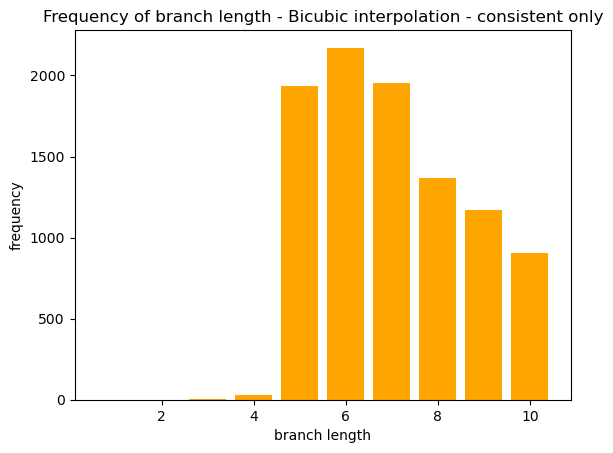

In [29]:
num_branches = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
length = [0, 0, 5, 29, 1936, 2171, 1955, 1365, 1172, 906]

plt.bar(num_branches, length, color = "orange")

# Add title and labels
plt.title('Frequency of branch length - Bicubic interpolation - consistent only')
plt.xlabel('branch length')
plt.ylabel('frequency')

# Show the plot
plt.show()